In [2]:
import numpy as np
import pandas as pd
import csv
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
engine = pyttsx3.init()
def text_to_speech(text):
    engine.setProperty('rate', 150)
    engine.setProperty('volume', 0.9)
    engine.say(text)
    engine.runAndWait()

### Exploratory Data Analysis (EDA)

In [4]:
training = pd.read_csv('Data/Training.csv')
testing= pd.read_csv('Data/Testing.csv')
shape = training.shape
print("Shape of Training dataset: ", shape)

Shape of Training dataset:  (4920, 133)


In [5]:
description = training.describe()
description

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
info_df = training.info()
info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
null_values_count = training.isnull().sum()
null_values_count

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
training.head(8)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [9]:
cols= training.columns
cols= cols[:-1]

In [10]:
x = training[cols]
y = training['prognosis']

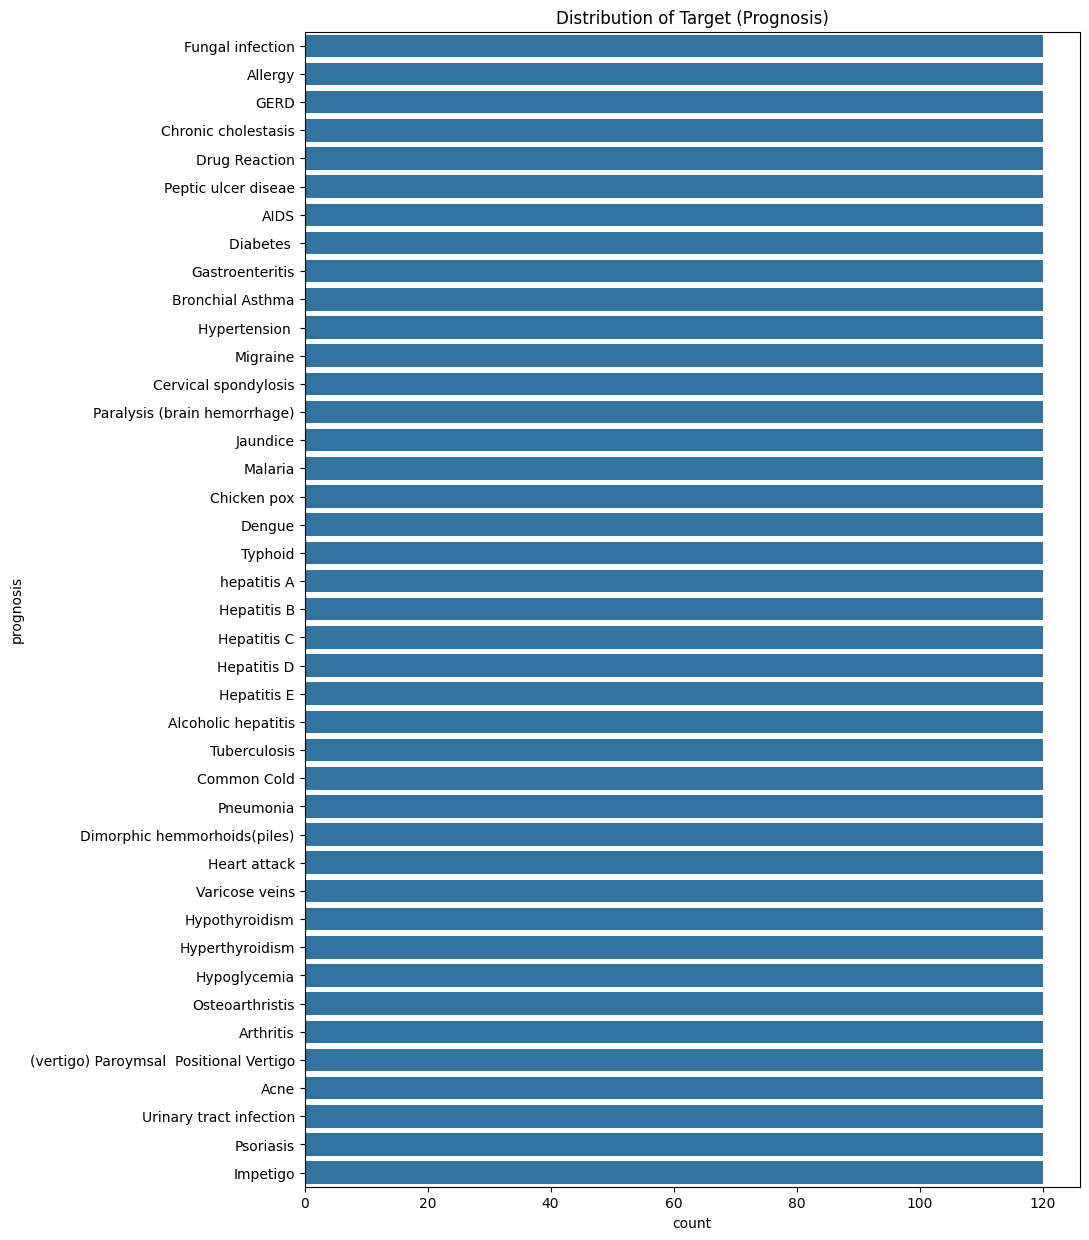

In [15]:
plt.figure(figsize=(10, 15))
sns.countplot(y='prognosis', data=training)
plt.title('Distribution of Target (Prognosis)')
plt.show()

In [19]:
reduced_data = training.groupby(training['prognosis']).max()
reduced_data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicken pox,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data PreProcessing

In [20]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
test_x    = testing[cols]
test_y    = testing['prognosis']
test_y = le.transform(test_y)

### Model Creation

In [24]:
clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
scores = cross_val_score(clf, x_test, y_test, cv=3)
print("Mean Score: ",scores.mean())

Mean Score:  0.9753701973248937


In [25]:
model=SVC()
model.fit(x_train,y_train)
print("Accuracy score for svm: ", model.score(x_test,y_test))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

Accuracy score for svm:  1.0


In [26]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()
symptoms_dict = {}
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index

In [27]:
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")

In [46]:
engine = pyttsx3.init()

In [38]:
def getDescription():
    global description_list
    with open('Data/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

In [39]:
def getSeverityDict():
    global severityDictionary
    with open('Data/Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass

In [40]:
def getprecautionDict():
    global precautionDictionary
    with open('Data/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)

In [49]:
def getInfo():
    print("-----------------------------------HealthCare ChatBot-----------------------------------")
    text_to_speech("Welcome to the HealthCare ChatBot.")
    print("\nYour Name? \t\t\t\t", end="->")
    text_to_speech("Your name please?")
    name = input("")
    print("Hello", name)
    text_to_speech(f"Hello {name}")

In [42]:
def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]

In [43]:
def sec_predict(symptoms_exp):
    df = pd.read_csv('Data/Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])

In [44]:
def print_disease(node):
    node = node[0]
    val  = node.nonzero()
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

In [53]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []

    while True:
        engine.say("\n Enter the symptom you are experiencing \t\t\t",)
        engine.runAndWait()
        print("\nEnter the symptom you are experiencing  \t\t",end="->")
        disease_input = input("")

        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
        else:
            print("Enter valid symptom.")
    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter valid input.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])

            red_cols = reduced_data.columns
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]

            engine.say("Are you experiencing any")
            engine.runAndWait()
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                engine.say(f"{syms}, are you experiencing it?")
                engine.runAndWait()
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                engine.say("You may have ", present_disease[0])
                engine.runAndWait()
                print("You may have ", present_disease[0])
                print(description_list[present_disease[0]])

            else:
                engine.say(f"You may have {present_disease[0]} or {second_prediction[0]}.")
                engine.runAndWait()
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)


    recurse(0, 1)

In [54]:
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)
print("----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------HealthCare ChatBot-----------------------------------

Your Name? 				->Hello Amish

Enter the symptom you are experiencing  		->Enter valid symptom.

Enter the symptom you are experiencing  		->searches related to input: 
0 ) itching
1 ) internal_itching
Select the one you meant (0 - 1):  Are you experiencing any 
vomiting ? : indigestion ? : loss_of_appetite ? : abdominal_pain ? : passage_of_gases ? : internal_itching ? : 

c:\Users\amish\anaconda3\envs\healthcare\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


You should take the consultation from doctor. 
You may have  Peptic ulcer diseae
Peptic ulcer disease (PUD) is a break in the inner lining of the stomach, the first part of the small intestine, or sometimes the lower esophagus. An ulcer in the stomach is called a gastric ulcer, while one in the first part of the intestines is a duodenal ulcer.
Take following measures : 
1 ) avoid fatty spicy food
2 ) consume probiotic food
3 ) eliminate milk
4 ) limit alcohol
----------------------------------------------------------------------------------------------------------------------------------
